In [1]:
import pandas
import pandasql
import matplotlib.pyplot

In [2]:
def SQLVisualization(query):
    resulting_table = pandasql.sqldf(query, globals())
    
    # extract metadata
    if 'plottype' in resulting_table:
        plottype = resulting_table['plottype'].unique()[0]
    else:
        raise
    if 'xlabel' in resulting_table:
        xlabel = resulting_table['xlabel'].unique()[0]
    if 'ylabel' in resulting_table:
        ylabel = resulting_table['ylabel'].unique()[0]
    if 'group' in resulting_table:
        groups = True
    else:
        groups = False

    if plottype == 'scatterplot':
        for name, group in resulting_table.groupby('group'):
            matplotlib.pyplot.scatter(group['x'], group['y'], label=name)
        if groups == True:
            matplotlib.pyplot.legend()
    if plottype == 'boxplot':
        x = []
        labels = []
        for name, group in resulting_table.groupby("group"):
            labels.append(name)
            x.append(group['x'].values)
        matplotlib.pyplot.boxplot(x, labels=labels)

    if 'xlabel' in resulting_table: 
        matplotlib.pyplot.xlabel(xlabel)
    if 'ylabel' in resulting_table: 
        matplotlib.pyplot.ylabel(ylabel)

    matplotlib.pyplot.show()

In [3]:
data = [
  {'age': 20, 'weight': 82, 'sex': 'm' },
  {'age': 21, 'weight': 72, 'sex': 'f' },
  {'age': 40, 'weight': 86, 'sex': 'm' },
  {'age': 37, 'weight': 75, 'sex': 'f' },
]

data = pandas.DataFrame(data)
data.head()

,age,weight,sex
0,20,82,m
1,21,72,f
2,40,86,m
3,37,75,f


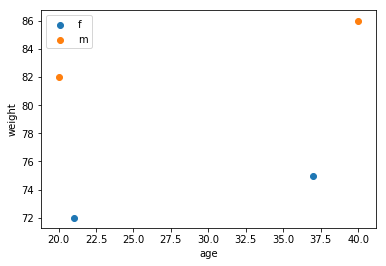

In [4]:
query = """
SELECT
    age AS 'x',
    weight AS 'y',
    sex AS 'group',
    'scatterplot' AS 'plottype',
    'age' AS 'xlabel',
    'weight' AS 'ylabel'
FROM
    data
"""

SQLVisualization(query)

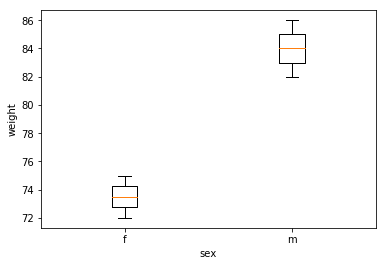

In [5]:
query = """
SELECT
    weight AS 'x',
    sex AS 'group',
    'boxplot' AS 'plottype',
    'sex' AS 'xlabel',
    'weight' AS 'ylabel'
FROM
    data
"""

SQLVisualization(query)